# The best way to understand MCMC 

is by watching the following video:

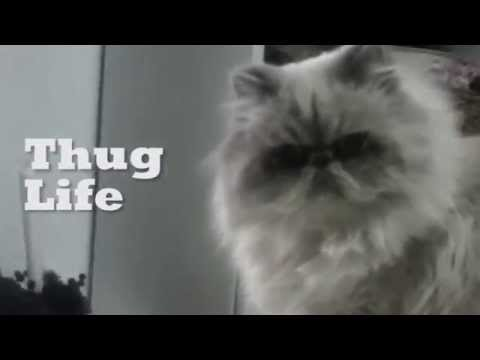

In [268]:
from IPython.display import YouTubeVideo
YouTubeVideo('UoUEQYjYgf4', width=800, height=600)

You got it? Well I certainly didn't but it was a lof of fun. Now let's find out what MCMC is.

# So what is Markov Chain Monte Carlo (MCMC)?



<img src="http://library.stjosephsea.org/mountainsman.gif" style="width: 420px;">

<h5 align="center">Image courtesy of <a href="http://www.pppst.com/clipart.html" target="_blank">Pete's Power Point Station 
</a></h5>

A mountain climber was fascinated by a new and pretty vast (by the looks of it) mountain. He decided to spend a day trying to find/climb the tallest peak and take the most beutiful pictures from there. He also wanted to fully explore the mountain, just in case that other marvelous places are hidden within it and deserve his attention.

He decided on a simple strategy - the time that he is going to spend on a peak is proportional to it's height. Given 2 peaks A and B and the height of peak B is 2 times that of A, the climber is going to spend 2 times more time on B than on A. 

When deciding where to go next he would pick probabilities for the two possible actions he could take (proportional on the current spot height) - stay at the current spot or move. He would calculate acceptance probability by dividing the that of moving by the one of staying, pick a random number in the range [0, 100] and if the acceptance probability is larger than the random number he would indeed move to a new position.

That way he would explore a lot and spend as much time as possible on taller peaks (just because when he was in lower areas his view was more likely to blocked by the higher peaks around). He did that and it was quite successful endeavour. But why?

<img src="https://cdn.vectorstock.com/i/composite/23,35/cartoon-gangster-flipping-a-coin-vector-7112335.jpg" style="width: 360px;">

<h5 align="center">Image courtesy of <a href="http://kenbennerillustration.weebly.com/" target="_blank">Ken Benner</a></h5>

In [250]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
from pylab import rcParams

%matplotlib inline
sns.set(style='ticks', palette='Set2', font_scale=1.5)

material_palette = ["#4CAF50", "#2196F3", "#9E9E9E", "#FF9800", "#607D8B", "#9C27B0"]
sns.set_palette(material_palette)
rcParams['figure.figsize'] = 16, 8

plt.xkcd();
np.random.seed(42);

1 heads, 0 tails

70 cents for heads

-40 cents for tails

100 coin flips

In [251]:
ivan_flips = [0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0]

peter_flips = [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0]

In [252]:
i_a = ivan_flips.count(1)
i_b = ivan_flips.count(0)

p_a = peter_flips.count(1)
p_b = peter_flips.count(0)

In [253]:
def beta_pdf(x, a, b):
    return stats.beta.pdf(x, a, b)

def should_accept(acceptance_probability):
    # Use uninformed (flat) prior
    prior_data_point = np.random.uniform(0, 1)
    return acceptance_probability > prior_data_point

def calculate_acceptance_probability(proposed_state, current_state, a, b):
    p_proposed = beta_pdf(proposed_state, a, b)
    p_current = beta_pdf(current_state, a, b)
    return min(p_proposed / p_current, 1)

def propose_state():
    return np.random.uniform(0, 1)

def beta_mcmc(a, b, iterations=5000):
    traces = []
    current_state = propose_state()
    for _ in range(iterations):
        traces.append(current_state)
        proposed_state = propose_state()
        acceptance_prob = calculate_acceptance_probability(proposed_state, current_state, a, b)
        if should_accept(acceptance_prob):
            current_state = proposed_state
    return_trace_count = max(int(0.4 * iterations), 2000)
    return traces[-return_trace_count:]

In [254]:
def plot_beta(a, b, label):
    traces = beta_mcmc(a, b, 10000)
    text = label + ": h="+str(a)+", t="+str(b)
    plt.hist(traces,
             normed=True,
             bins=25,
             histtype='stepfilled',
             label=text)

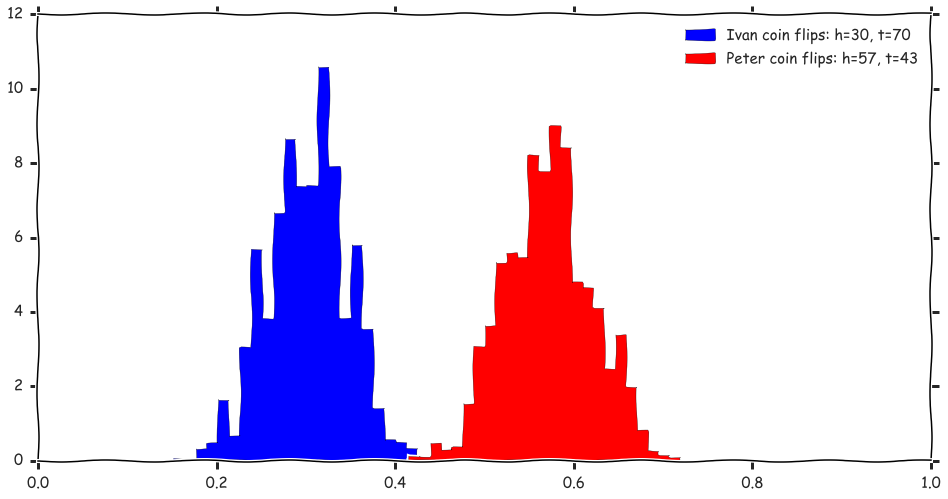

In [255]:
plt.hold(True)
plot_beta(i_a, i_b, "Ivan coin flips")
plot_beta(p_a, p_b, "Peter coin flips")
plt.legend()
plt.xlim((0, 1))
plt.show()

In reality the coin in Ivan's hands had about 35% probability of landing heads. And the one in Peter's pocket? It was a fair coin (50/50). So 100 flips from both of those coins look like this:

In [258]:
ivan_flips = np.random.binomial(1, 0.35, 100)
peter_flips = np.random.binomial(1, 0.5, 100)
print("100 flips with Ivan's coin:\n", ivan_flips)
print()
print("100 flips with Peter's coin:\n", peter_flips)

100 flips with Ivan's coin:
 [1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1
 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1]

100 flips with Peter's coin:
 [1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1
 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1
 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0]


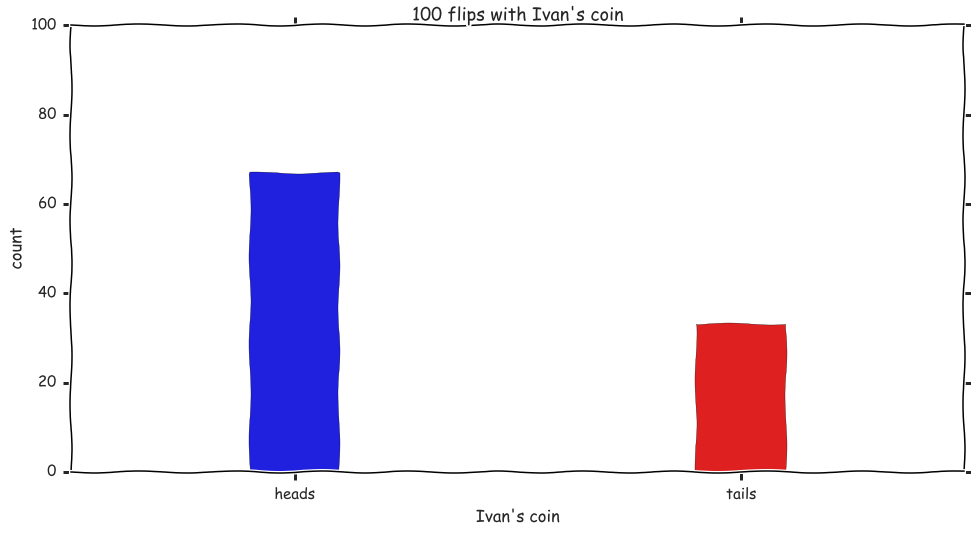

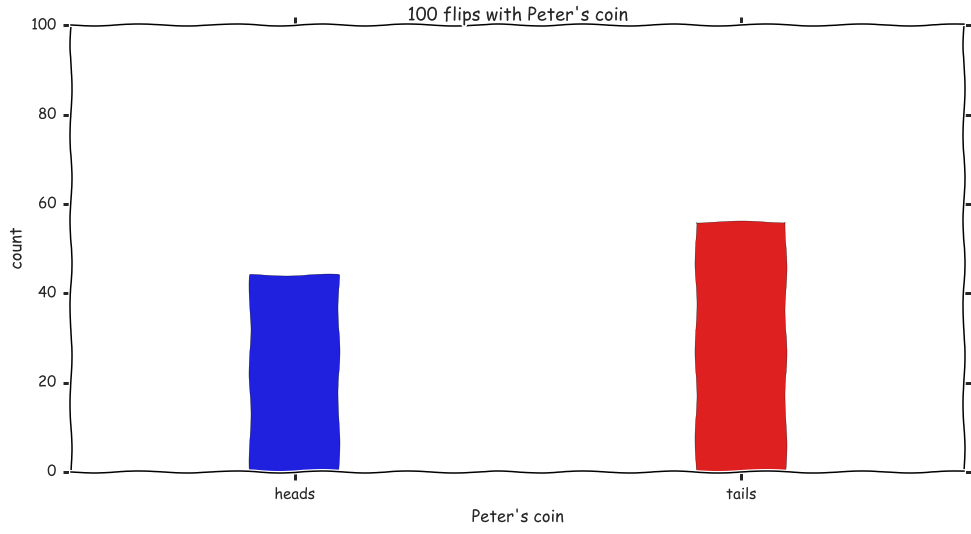

In [259]:
def adjust_bar_widths(axis):
    for bar in axis.patches:
        x = bar.get_x()
        width = bar.get_width()
        centre = x+width / 2.
        new_width = 0.2
        bar.set_x( centre - new_width /2.)
        bar.set_width(new_width)

df = pd.DataFrame.from_dict(dict(ivan=ivan_flips, peter=peter_flips))

ax = sns.countplot(x='ivan', data=df)
ax.set_title("100 flips with Ivan's coin")
ax.set_xticklabels(['heads', 'tails'])
ax.set_xlabel("Ivan's coin")
ax.set_ylabel("count")
ax.set_ylim((0, 100))
adjust_bar_widths(ax)
plt.show()

ax = sns.countplot(x='peter', data=df)
ax.set_title("100 flips with Peter's coin")
ax.set_xticklabels(['heads', 'tails'])
ax.set_xlabel("Peter's coin")
ax.set_ylabel("count")
ax.set_ylim((0, 100))
adjust_bar_widths(ax)
plt.show()